In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas
import numpy
import matplotlib.pyplot

In [2]:
adrash=pandas.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [3]:
adrash

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
adrash.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
adrash

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
adrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
adrash.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [10]:
airline=[]
for i in adrash.airline:
    if i=='Vistara':
        airline.append(0)
    elif i=='Air_India':
        airline.append(1)
    elif i=='Indigo':
        airline.append(2)
    elif i=='GO_FIRST':
        airline.append(3)
    elif i=='AirAsia':
        airline.append(4)
    else:
        airline.append(5)
    

In [12]:
adrash.drop('airline',axis=1,inplace=True)

In [13]:
adrash['airline']=airline

In [14]:
adrash

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,4
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0
300149,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0
300150,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0
300151,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0


In [17]:
adrash.drop('flight',axis=1,inplace= True)

In [18]:
adrash


,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline
0,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5
1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5
2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,4
3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0
300149,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0
300150,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0
300151,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0


In [46]:
source_city=[]
for i in adrash.source_city:
    if i=='Delhi':
        source_city.append(0)
    elif i=='Mumbai':
        source_city.append(1)
    elif i=='Bangalore':
        source_city.append(2)
    elif i=='Kolkata':
        source_city.append(3)
    elif i=='Hyderabad':
        source_city.append(4)
    else:
        source_city.append(5)

In [38]:
departure_time=[]
for i in adrash.departure_time:
    if i=='Morning':
        departure_time.append(0)
    elif i=='Early_Morning':
        departure_time.append(1)
    elif i=='Evening':
        departure_time.append(2)
    elif i=='Night':
        departure_time.append(3)
    elif i=='Afternoon':
        departure_time.append(4)
    else:
        departure_time.append(5)

In [39]:
stops=[]
for i in adrash.stops:
    if i=='one':
        stops.append(0)
    elif i=='zero':
        stops.append(1)
    elif i=='two_or_more':
        stops.append(2)

In [40]:
arrival_time=[]
for i in adrash.arrival_time:
    if i=='Morning':
        arrival_time.append(0)
    elif i=='Early_Morning':
        arrival_time.append(1)
    elif i=='Evening':
        arrival_time.append(2)
    elif i=='Night':
        arrival_time.append(3)
    elif i=='Afternoon':
        arrival_time.append(4)
    else:
        arrival_time.append(5)

In [41]:
destination_city=[]
for i in adrash.destination_city:
    if i=='Delhi':
        destination_city.append(0)
    elif i=='Mumbai':
        destination_city.append(1)
    elif i=='Bangalore':
        destination_city.append(2)
    elif i=='Kolkata':
        destination_city.append(3)
    elif i=='Hyderabad':
        destination_city.append(4)
    else:
        destination_city.append(5)

In [42]:
cllass=[]
for i in adrash['class']:
    if i=='Economy':
        cllass.append(0)
    elif i=='Business':
        cllass.append(1)

In [43]:
adrash

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline
0,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5
1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5
2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,4
3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0
300149,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0
300150,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0
300151,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0


In [47]:
len(source_city)

300153

In [48]:
adrash['source_city']=source_city
adrash['departure_time']=departure_time
adrash['stops']=stops
adrash['arrival_time']=arrival_time
adrash['destination_city']=destination_city
adrash['class']=cllass



In [49]:
adrash

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline
0,0,2,1,3,1,0,2.17,1,5953,5
1,0,1,1,0,1,0,2.33,1,5953,5
2,0,1,1,1,1,0,2.17,1,5956,4
3,0,0,1,4,1,0,2.25,1,5955,0
4,0,0,1,0,1,0,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...
300148,5,0,0,2,4,1,10.08,49,69265,0
300149,5,4,0,3,4,1,10.42,49,77105,0
300150,5,1,0,3,4,1,13.83,49,79099,0
300151,5,1,0,2,4,1,10.00,49,81585,0


In [51]:
adrash.describe()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.201487,1.794901,0.208480,2.229656,2.274104,0.311464,12.221021,26.004751,20889.660523,1.153072
std,1.684757,1.401659,0.503533,1.437956,1.682563,0.463093,7.191997,13.561004,22697.767366,1.348357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6.830000,15.000000,4783.000000,0.000000
50%,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,11.250000,26.000000,7425.000000,1.000000
75%,4.000000,3.000000,0.000000,3.000000,4.000000,1.000000,16.170000,38.000000,42521.000000,2.000000
max,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000,5.000000


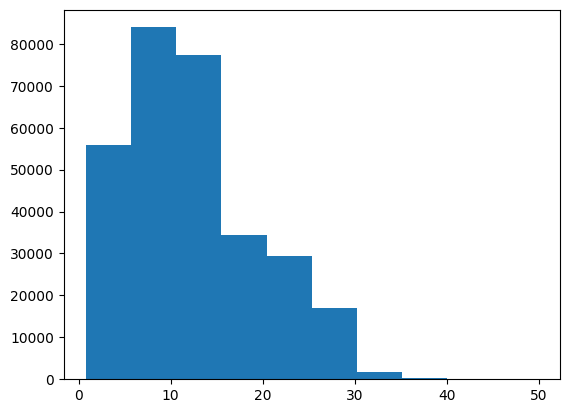

In [59]:
dev,harsh=matplotlib.pyplot.subplots()
harsh.hist(adrash.duration)
matplotlib.pyplot.show()

In [60]:
verma=adrash.price
adrash.drop('price',axis=1,inplace=True)

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(adrash,verma,test_size=0.2)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model=RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [69]:
model.score(xtest,ytest)

0.9850428407909084

In [70]:
xtrain

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,airline
112331,2,0,0,2,4,0,10.42,24,0
178470,4,0,0,2,5,0,7.67,27,1
12950,0,0,1,0,2,0,2.75,17,0
227679,1,4,1,2,0,1,2.33,28,0
213415,0,3,0,0,2,1,13.08,19,0
...,...,...,...,...,...,...,...,...,...
30719,0,2,0,3,4,0,27.08,17,1
51399,1,0,0,4,0,0,5.75,43,4
193793,5,1,0,4,1,0,6.67,49,1
98801,2,0,0,2,1,0,6.83,28,2


In [ ]:
arrival_time=[]
for i in adrash.arrival_time:
    if i=='Morning':
        arrival_time.append(0)
    elif i=='Early_Morning':
        arrival_time.append(1)
    elif i=='Evening':
        arrival_time.append(2)
    elif i=='Night':
        arrival_time.append(3)
    elif i=='Afternoon':
        arrival_time.append(4)
    else:
        arrival_time.append(5)

In [75]:
a=int(input('enter source_city from delhi(0) , kolkata(3), banglore(2) , mumbai(1), hyderabad(4),chennai(5)'))
b=int(input('enter departure_time for morning(0), early_morning(1), evening(2), night(3) afternoon(4)'))
c=int(input('enter the number of stops'))
d=int(input('enter arival_time for morning(0), early_morning(1), evening(2), night(3) afternoon(4)'))
e=int(input('enter destination_city from delhi(0) , kolkata(3), banglore(2) , mumbai(1), hyderabad(4),chennai(5)'))
f=int(input('enter class 0 for economy and 1 for business'))
g=float(input('enter hours of duration'))
h=int(input('enter days left'))
i=int(input('enter flight company Vistara(0), Air_India(1),Indigo(2),GO_FIRST(3),AirAsia(4),spicejet(5)'))
p=model.predict([[a,b,c,d,e,f,g,h,i]])
print(f'the price of the flight{p[0]}')

enter source_city from delhi(0) , kolkata(3), banglore(2) , mumbai(1), hyderabad(4),chennai(5) 3
enter departure_time for morning(0), early_morning(1), evening(2), night(3) afternoon(4) 2
enter the number of stops 0
enter arival_time for morning(0), early_morning(1), evening(2), night(3) afternoon(4) 4
enter destination_city from delhi(0) , kolkata(3), banglore(2) , mumbai(1), hyderabad(4),chennai(5) 2
enter class 0 for economy and 1 for business 1
enter hours of duration 10
enter days left 2
enter flight company Vistara(0), Air_India(1),Indigo(2),GO_FIRST(3),AirAsia(4),spicejet(5) 4


the price of the flight[62433.31]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
